

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [14]:
import matplotlib
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import numpy as np     # This is for general numerical operations 
import seaborn as sns  # This allows us to efficiently and beautifully plot
import os              # This provides several system utilities

In [12]:
from IPython.display import IFrame

sheet_url = "https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?usp=sharing"

IFrame(sheet_url, width=900, height=500)


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [218]:
# file downloaded as csv to the download folder
f = 'C:\\Users\\natha\\Downloads\\Wikileaks.csv'

#create table and remove the unecessary top row.
db = pd.read_csv(f, header=1)

#display the first 5 rows of the dataset
db.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004.0,January,15,51,23,NaN,11.0
1,2004.0,February,NaN,7,4,5,2.0
2,2004.0,March,19,2,NaN,2,3.0
3,2004.0,April,5,3,19,NaN,3.0
4,2004.0,May,18,29,56,6,9.0


In [198]:
# create dictionary
dictionary = db.to_dict(orient='index')

# extract only the first row
dic = dictionary[0]

# check
dic

{'Year': 2004.0,
 'Month': 'January',
 'Taliban': '15',
 'Civilians': '51',
 'Afghan forces': '23',
 'Nato (detailed in spreadsheet)': nan,
 'Nato - official figures': 11.0}

#first attempt

db_dictionary = {}
column_names = db.columns.values
row = db.head(1)

for code in column_names:
    db_dictionary[code] = 2   #how to code the first row?
db_dictionary

## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

In [392]:
# IGNORE just calling the table for easy reference
db.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004.0,January,15.0,51.0,23.0,NaN,11.0
1,2004.0,February,NaN,7.0,4.0,5.0,2.0
2,2004.0,March,19.0,2.0,NaN,2.0,3.0
3,2004.0,April,5.0,3.0,19.0,NaN,3.0
4,2004.0,May,18.0,29.0,56.0,6.0,9.0


In [225]:
# IGNORE converting objects to numbers to facilitate operations later
db['Taliban'] = pd.to_numeric(db['Taliban'], errors='coerce', downcast='integer')
db['Civilians'] = pd.to_numeric(db['Civilians'], errors='coerce', downcast='integer')
db['Afghan forces'] = pd.to_numeric(db['Afghan forces'], errors='coerce', downcast='integer')
db['Nato (detailed in spreadsheet)'] = pd.to_numeric(db['Nato (detailed in spreadsheet)'], errors='coerce', downcast='integer')
db['Nato - official figures'] = pd.to_numeric(db['Nato - official figures'], errors='coerce', downcast='integer')
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            72 non-null     float64
 1   Month                           73 non-null     object 
 2   Taliban                         71 non-null     float64
 3   Civilians                       72 non-null     float64
 4   Afghan forces                   70 non-null     float64
 5   Nato (detailed in spreadsheet)  66 non-null     float64
 6   Nato - official figures         72 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.1+ KB


In [393]:
# IGNORE verifying successful conversion to numbers for peace of mind
db.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004.0,January,15.0,51.0,23.0,NaN,11.0
1,2004.0,February,NaN,7.0,4.0,5.0,2.0
2,2004.0,March,19.0,2.0,NaN,2.0,3.0
3,2004.0,April,5.0,3.0,19.0,NaN,3.0
4,2004.0,May,18.0,29.0,56.0,6.0,9.0


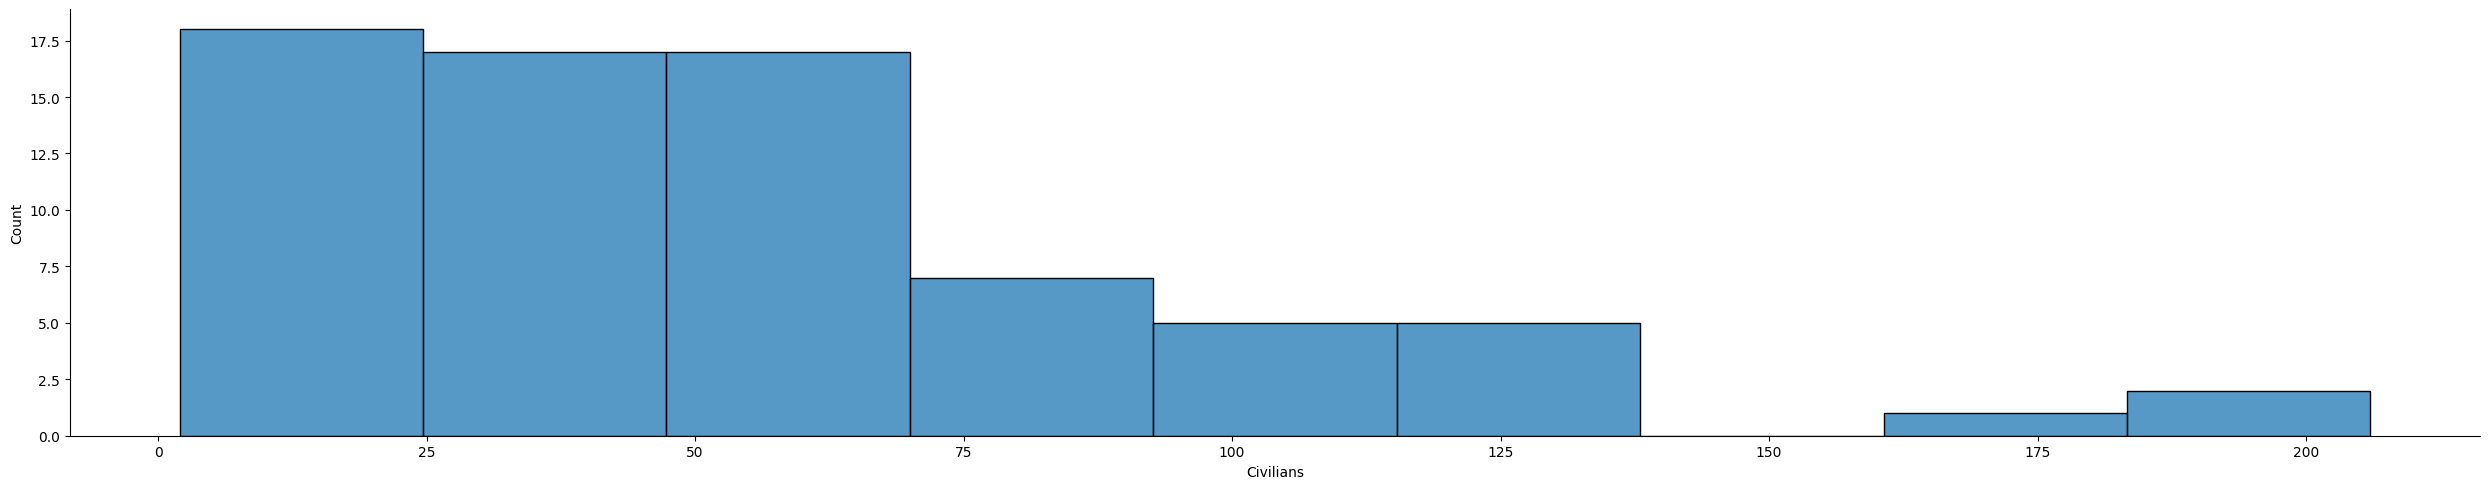

In [398]:
# PART A: plot a histogram

# sort by number of civilian deaths
civilian_deaths = db.sort_values('Civilians', ascending=False)
# plot the histogram
civilian_histogram = sns.displot(civilian_deaths['Civilians'], height=5, aspect=5)

# Conclusion: most operations led to a "small" number of civilian deaths.

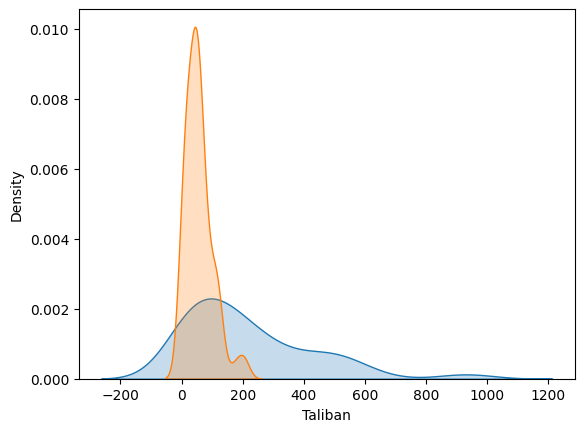

In [272]:
# PART B: plot a kernel density plot

# sort by number of taliban deaths
taliban_deaths = db.sort_values('Taliban', ascending=False)
# create kernel density plot of taliban deaths
taliban_kde = (sns.kdeplot(taliban_deaths['Taliban'], fill=True),
               sns.kdeplot(taliban_deaths['Civilians'], fill=True)) # I thought it would be interesting to compare this to civilian deaths

# Conclusion: It's a bit confusing. The data below suggests that there are often more civilian deaths than Taliban deaths for certain types of operations. 
# The raw data does somewhat validate this, but it doesn't at a glance appear to be as extreme as the plot below suggests. 
# It might be interesting to extract the rows where 'Civilians' > 'Taliban'. This would help us figure out how often this was an issue and how serious the issue is.

In [406]:
# PART C: Create a bar chart of a categorical variable and discuss how the plot changes if you swap the orientation

# Simple bar chart using Marnix help. 
# Intent: group the months together to determine if there is a particular month that is particularly deadly. 
# sns.barplot(db, x="Month", y="Civilians").tick_params(axis='x', rotation=30)

# Conclusion: September appears to be the most deadly month. However, not consistently so. Best to be cautious with this data.

# while this is a nice clean graph, I don't think it satisfies the intent of the assignment.

In [394]:
# IGNORE I wanted to clean up the table a bit and remove excess information.
db_abbreviated = db.loc[:, \
                  ['Month', 'Taliban', 'Civilians', 'Afghan forces']]
db_abbreviated.head()

,Month,Taliban,Civilians,Afghan forces
0,January,15.0,51.0,23.0
1,February,NaN,7.0,4.0
2,March,19.0,2.0,NaN
3,April,5.0,3.0,19.0
4,May,18.0,29.0,56.0


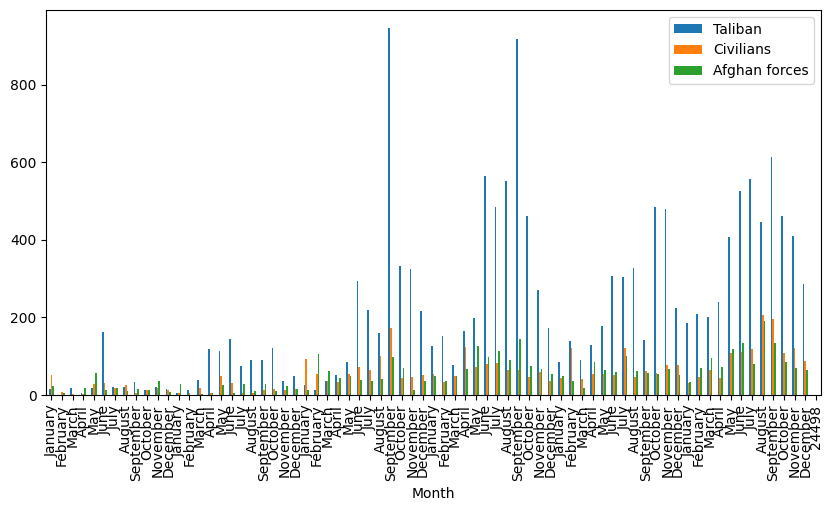

In [409]:
# PART C: Create a bar chart of a categorical variable and discuss how the plot changes if you swap the orientation
# the 'Month' column in the only categorical variable in the dataset?

# Vertical Bar Chart
Categorical_Variable = db_abbreviated.set_index('Month').plot(kind='bar', figsize=(10,5))

# Conclusion: really crowded and very difficult to read.

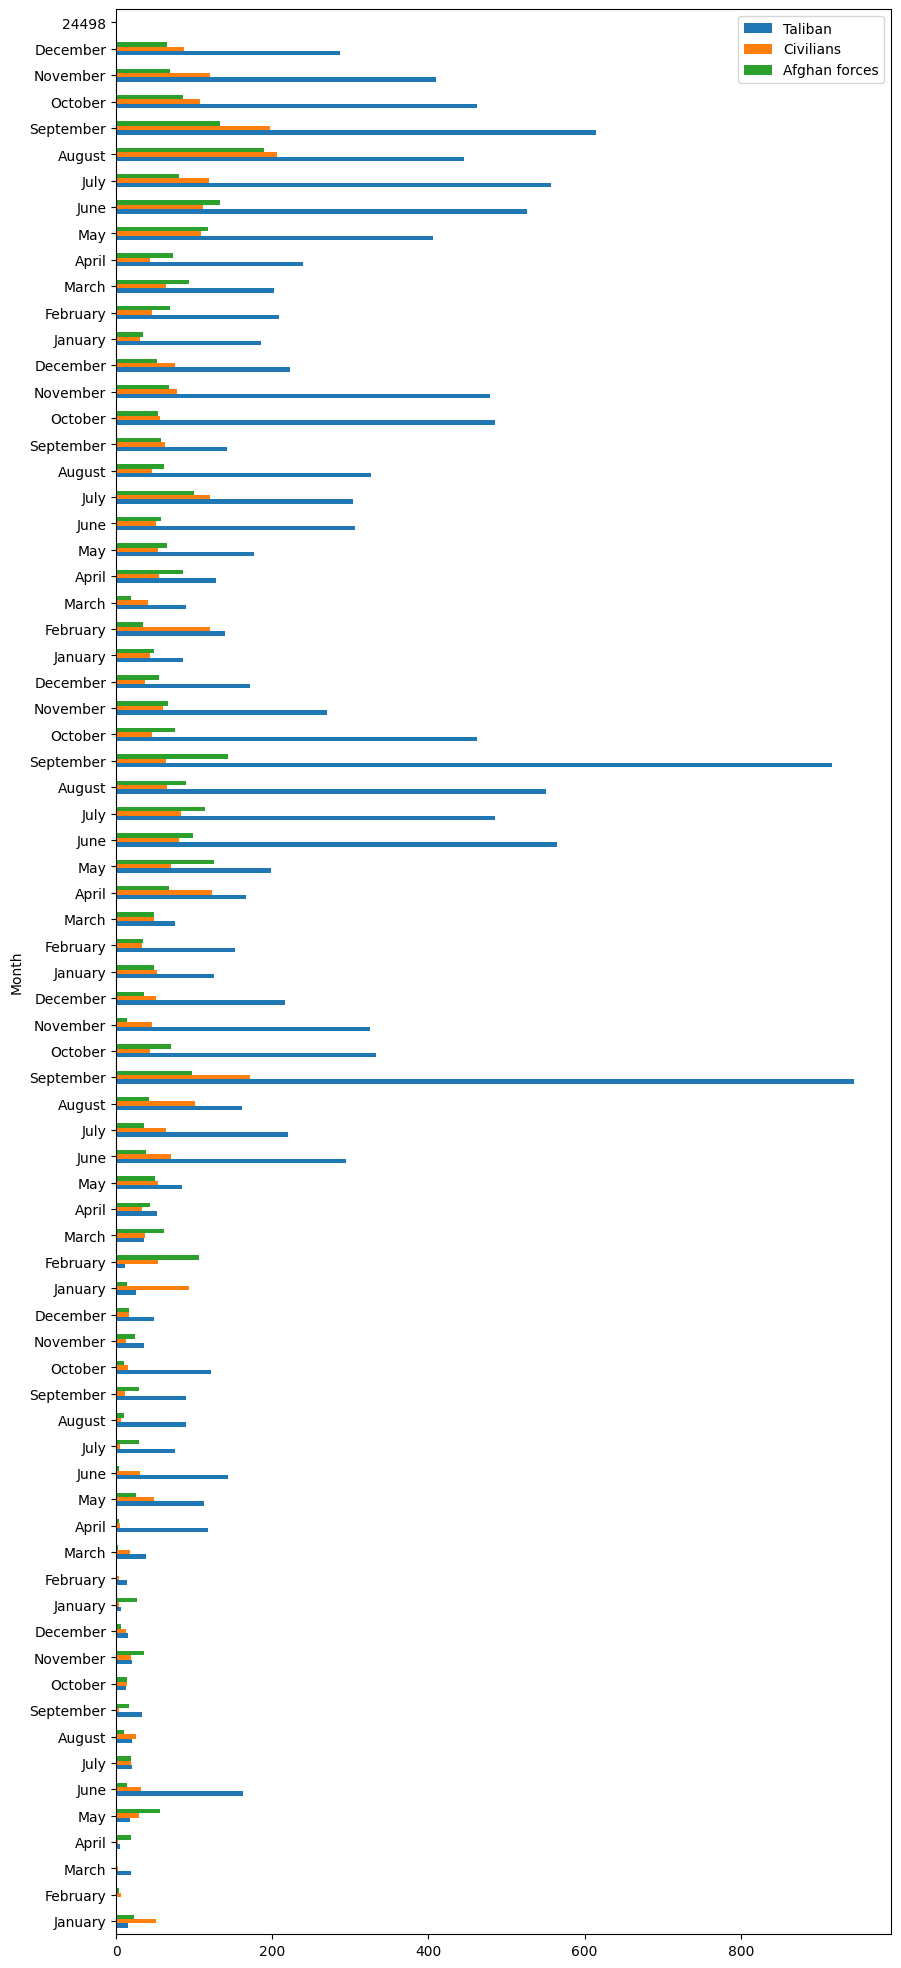

In [410]:
# PART C: Create a bar chart of a categorical variable and discuss how the plot changes if you swap the orientation
# the 'Month' column in the only categorical variable in the dataset?

# Horizontal Bar Chart
Categorical_Variable = db_abbreviated.set_index('Month').plot(kind='barh', figsize=(10,25))

# Conclusion: Much less crowded and easier to read, although there is a lot of scrolling.

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [411]:
# PART A: Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

# I will print all values in column 'Civilians'
for value in db['Civilians']:
    print(value)

51.0
7.0
2.0
3.0
29.0
32.0
19.0
26.0
4.0
14.0
19.0
13.0
4.0
4.0
18.0
5.0
49.0
31.0
5.0
6.0
12.0
15.0
13.0
16.0
93.0
54.0
37.0
33.0
54.0
71.0
64.0
101.0
172.0
44.0
46.0
51.0
53.0
33.0
48.0
123.0
71.0
80.0
83.0
65.0
64.0
46.0
60.0
37.0
43.0
120.0
41.0
55.0
54.0
51.0
120.0
46.0
63.0
56.0
78.0
76.0
31.0
46.0
64.0
44.0
109.0
111.0
119.0
206.0
197.0
107.0
120.0
87.0
nan


In [438]:
# PART B: Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

#create an empty list
l = []

for value in db['Civilians']:                       # create a loop that searches for values in column 'Civilians'
    if value > 100:                                 # if the value in column 'Civilians' is greater than 100
        l.append(value)                             # extract that value

# create a dataframe from a list and rename the column to Civilian Casualties.
df = pd.DataFrame(l, columns=['Civilian_Casualties'])
df

,Civilian_Casualties
0,101.0
1,172.0
2,123.0
3,120.0
4,120.0
5,109.0
6,111.0
7,119.0
8,206.0
9,197.0


## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


In [442]:
# Part A: Create a list containing the names "Civilians" and "Afghan forces"
l = ['Civilians', 'Afghan forces']
l

['Civilians', 'Afghan forces']

In [446]:
# Part B: From the imported data, keep the values from these two columns only. Don't delete other columns from the dataset.

# name new dataset db_abbreviated and import the data from the original db database using the list=l shortcut.
db_abbreviated = db.loc[:,l]
db_abbreviated.head()

,Civilians,Afghan forces
0,51.0,23.0
1,7.0,4.0
2,2.0,NaN
3,3.0,19.0
4,29.0,56.0


In [449]:
# Part C: Obtain a monthly total count of casualties for these two groups
db_abbreviated['total count'] = (db_abbreviated['Civilians']+db_abbreviated['Afghan forces'])

db_abbreviated

,Civilians,Afghan forces,total count
0,51.0,23.0,74.0
1,7.0,4.0,11.0
2,2.0,NaN,NaN
3,3.0,19.0,22.0
4,29.0,56.0,85.0
...,...,...,...
68,197.0,133.0,330.0
69,107.0,86.0,193.0
70,120.0,69.0,189.0
71,87.0,65.0,152.0


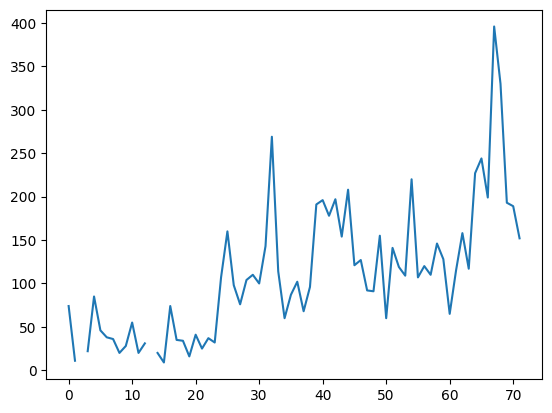

In [452]:
# Part C: Create a line plot
line_plot = db_abbreviated['total count'].plot(kind='line')

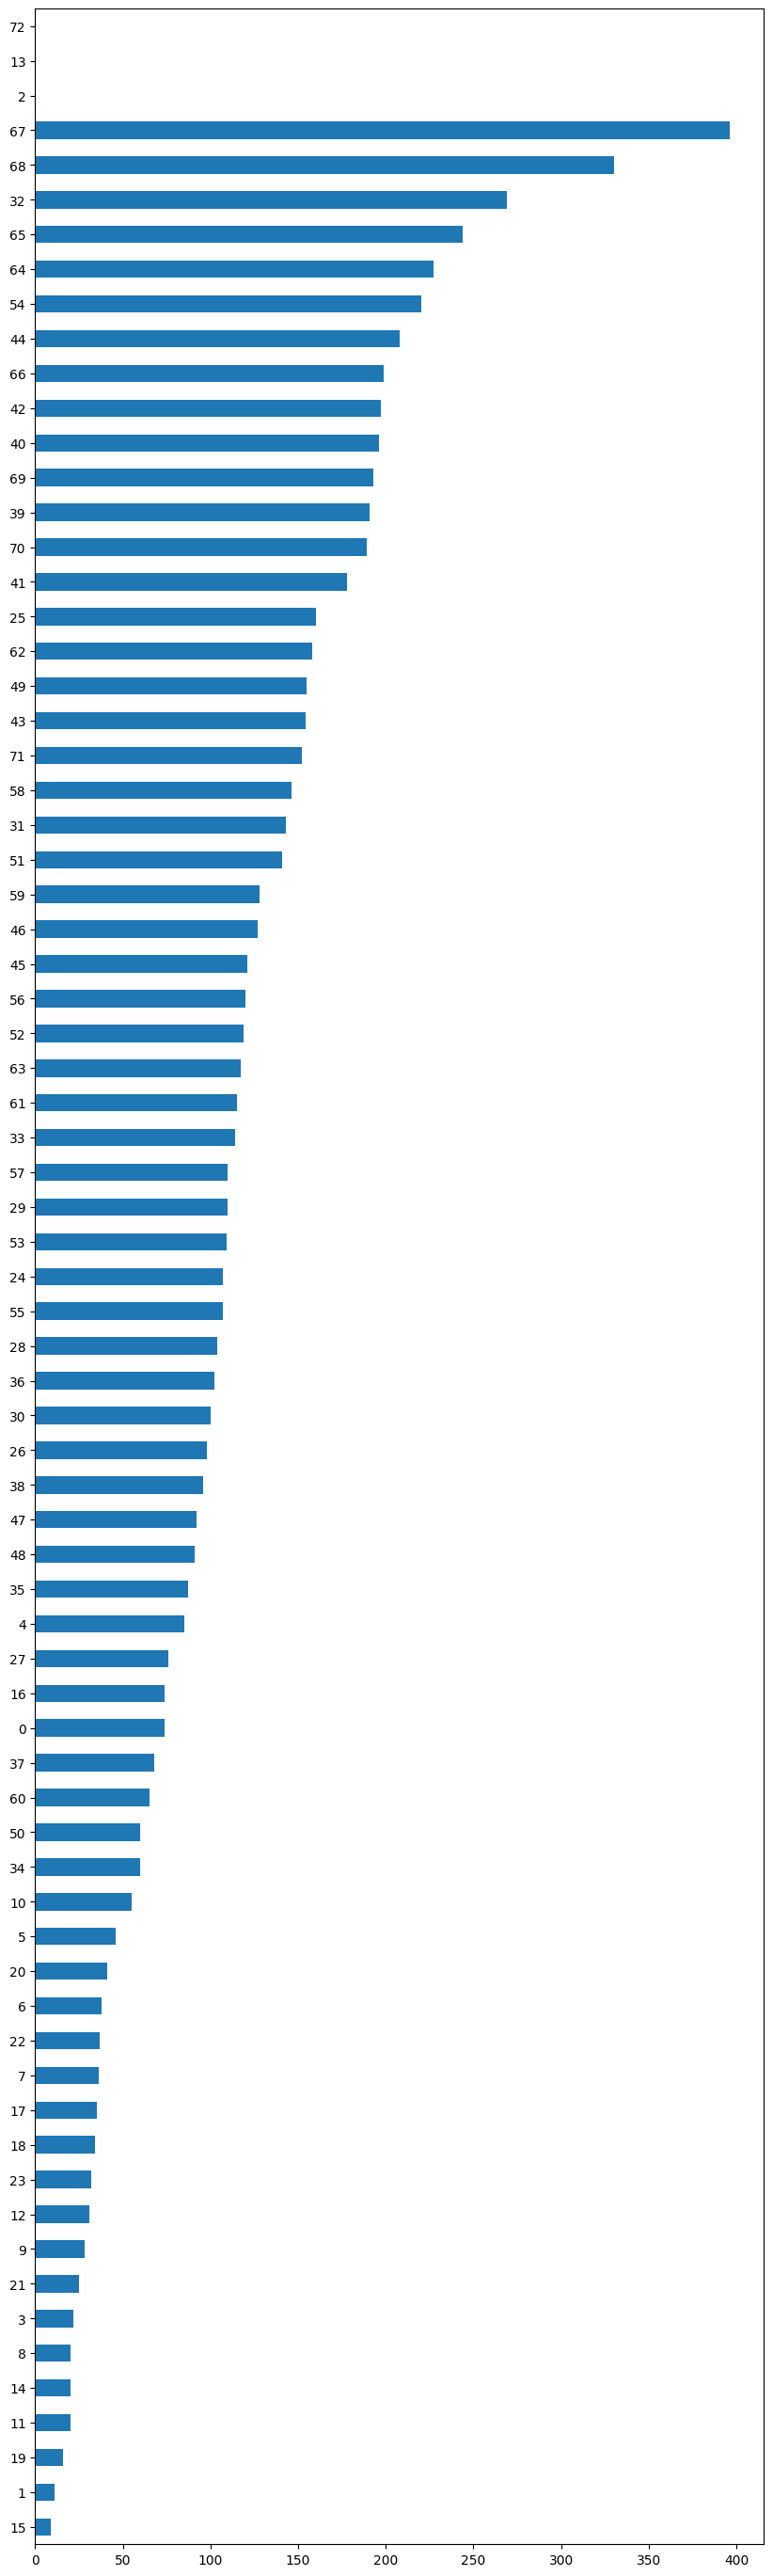

In [456]:
# Part C: Create a bar plot
bar_plot = db_abbreviated['total count'].sort_values().plot(kind='barh', figsize=(10,35))